# Movement samplers
This is the general analysis of movement sampler implementations.

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from movement_samplers import RandomCommuterSampler
from movement_epidemic import MovementEpidemic
from basic_epidemic import fit_model, transmission_nll
from grab_data import get_matrix, get_population_sizes
import matplotlib.pyplot as plt
import numpy as np

In [30]:
DATASET = 'CENSUS_SUBSAMPLED'
od_matrix = get_matrix(DATASET)
pop_sizes = get_population_sizes(DATASET)

In [35]:
epi = MovementEpidemic(RandomCommuterSampler, od_matrix, pop_sizes, beta =1.8, gamma=0.4, psi=0.8, t_max=150)
sim = epi.simulate()

Simulation finished, aggregating states.


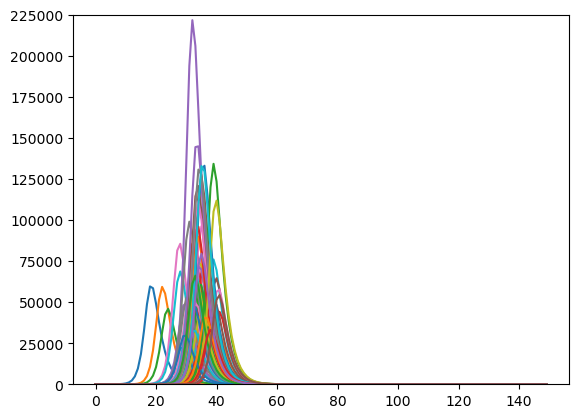

In [36]:
plt.plot(sim[1])
max_ax = 225000
plt.ylim((0,max_ax))
plt.show()

In [37]:
res = fit_model(sim, od_matrix, pop_sizes, t_delta=1)
res

(1.800124447454948, 0.4000878029585899, 0.8000015176518896)

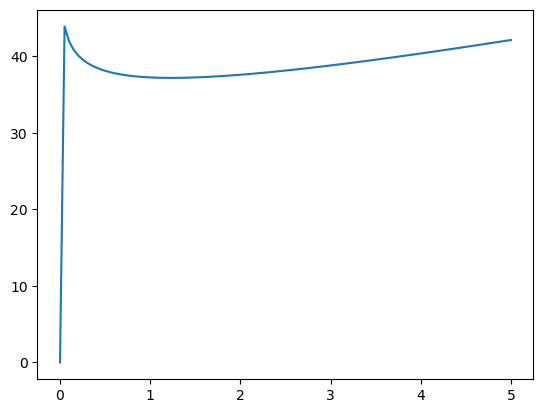

In [34]:
beta = np.linspace(0, 5, 100)
nll = [transmission_nll((b, 0.8), sim, pop_sizes, od_matrix) for b in beta]
plt.plot(beta, nll)
